In [ ]:
import sys; sys.path.insert(0, '..')
import os
import pandas as pd
import numpy as np
import timesync_utils as tutils
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate
from df_utils import df_wrapper, get_timestamp_and_pose, POSE_MAP, combine_dataframes
from dataclasses import dataclass

In [ ]:
@dataclass
class training_class:
    csv_file: str
    annot_file: str

@dataclass
class testing_class:
    csv_file: str
    annot_file: str

training_files = {
    "Martin": training_class("../../data/train_data/martin_train_3_030221.csv", 
                            "../../data/annotation/training/martin_train_3_030221.txt"),
    "Simon": training_class("../../data/train_data/simon_train_3_080221.csv",
                            "../../data/annotation/training/simon_train_3_080221.txt"),
    "Jonas": training_class("../../data/train_data/jonas_train_3_080221.csv",
                            "../../data/annotation/training/jonas_train_3_080221.txt")
}

testing_file = testing_class("../../data/test_data/martin_test_3_040221.csv",
                             "../../data/annotation/testing/martin_test_3_040221.txt")

AMOUNT_OF_SENSORS = 3

In [ ]:
knn_train = []
for key in training_files:
    elem = df_wrapper(training_files[key].csv_file)
    elem.concat_sensor_data(AMOUNT_OF_SENSORS)
    stamped_poses = get_timestamp_and_pose(training_files[key].annot_file, POSE_MAP)
    elem.align_poses(stamped_poses)
    knn_train.append(elem)

y_train = pd.concat([x.df['Pose'] for x in knn_train])

knn_test = df_wrapper(testing_file.csv_file)
knn_test.concat_sensor_data(AMOUNT_OF_SENSORS)
test_stamped_poses = get_timestamp_and_pose(testing_file.annot_file, POSE_MAP)
knn_test.align_poses(test_stamped_poses)
y_test = knn_test.df["Pose"]
y_test.index = [i for i in range(len(y_test))]

In [ ]:
cols = []
height=8
width=(height/1.5)*len(knn_train)
fig, axes = plt.subplots(2, len(knn_train)+1, figsize=(width, height))
fig.suptitle('Data visualisation')
for i in range(len(knn_train)):
    sns.lineplot(ax=axes[0, i], data=knn_train[i].df, x=" TimeStamp (s)", y='Pose')
    sns.histplot(ax=axes[1, i], data=knn_train[i].df["Pose"])
    cols.append('Train')    
for i, key in enumerate(training_files):
    cols[i] += f' {key}'
sns.lineplot(ax=axes[0, len(knn_train)], data=knn_test.df, x=" TimeStamp (s)", y='Pose')
sns.histplot(ax=axes[1, len(knn_train)], data=y_test)
cols.append('Test')
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
fig.tight_layout()
plt.show()

In [ ]:
x_train = combine_dataframes([x.df.drop([' TimeStamp (s)', 'Pose'],axis=1) for x in knn_train])
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 

x_train_numpy = x_train.values
x_test_numpy = x_test.values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54078
Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  52320
Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54117
Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  82600


82600

[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

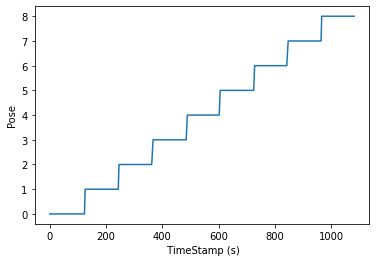

[[0.0, 129.84, 0], [130.88, 249.28, 1], [252.16, 370.48, 2], [372.96, 489.2, 3], [490.84, 610.68, 4], [612.84, 729.8, 5], [732.44, 849.36, 6], [851.12, 969.48, 7], [971.64, 1090.36, 8]]
Length of knn_train.df before drops: 52320
drops: 830
length of knn_train.df after drops: 51490
51490
51490


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

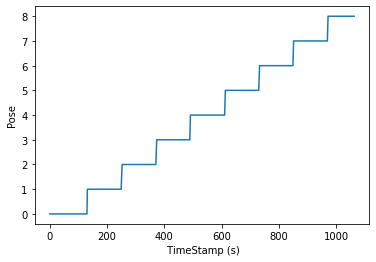

[[0.0, 118.24, 0], [121.96, 238.2, 1], [243.16, 365.04, 2], [371.96, 487.6, 3], [489.04, 609.44, 4], [615.56, 738.24, 5], [748.76, 863.0, 6], [866.36, 987.76, 7], [992.84, 1117.76, 8]]
Length of knn_train.df before drops: 54117
drops: 2098
length of knn_train.df after drops: 52019
52019
52019


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

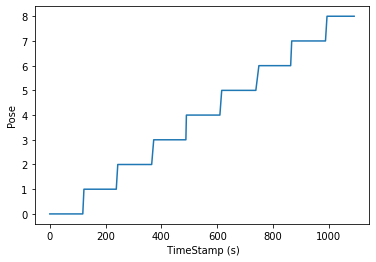

[[0.0, 183.08, 0], [186.36, 365.04, 1], [367.04, 549.32, 2], [555.24, 731.92, 3], [735.56, 916.4, 4], [920.24, 1103.08, 5], [1106.72, 1293.04, 6], [1305.68, 1476.0, 7], [1480.92, 1664.08, 8]]
Length of knn_train.df before drops: 82600
drops: 1987
length of knn_train.df after drops: 80613
80613
80613


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

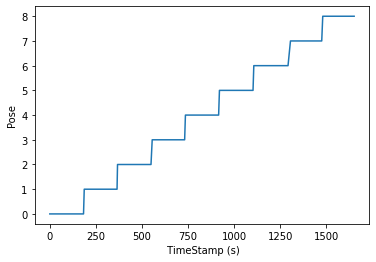

,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,Pose
0,0.0000,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,-28.373941,-27.243652,...,-20.748009,-36.988220,41.428467,9.834142,-69.666298,0.747616,-0.335055,0.135482,0.557184,0
1,0.0200,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,-28.711199,-27.876856,...,-20.920061,-37.734138,41.424286,9.828160,-69.678291,0.747584,-0.334987,0.135538,0.557254,0
2,0.0400,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,-28.458256,-26.610451,...,-20.461252,-36.868870,41.403576,9.871590,-69.696747,0.747453,-0.335022,0.135195,0.557491,0
3,0.0600,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,-28.289625,-27.394417,...,-20.432577,-36.809200,41.417000,9.883158,-69.709579,0.747324,-0.335146,0.135219,0.557584,0
4,0.0800,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,-29.441923,-27.243652,...,-20.260525,-37.077728,41.419933,9.901683,-69.730927,0.747169,-0.335222,0.135169,0.557759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82595,1651.9000,-0.409038,-0.299134,-0.864914,1.402430,-0.546268,0.574780,-24.252022,-20.560812,-24.831440,...,-22.583241,-32.095005,16.757982,-8.517997,-99.436493,0.646135,-0.037905,0.158363,0.745650,8
82596,1651.9200,-0.416576,-0.287627,-0.858833,1.501031,-2.412826,-0.653150,-24.369911,-21.122908,-24.529913,...,-22.697945,-32.811089,16.731310,-8.518748,-99.426048,0.646212,-0.037764,0.158190,0.745627,8
82597,1651.9399,-0.418081,-0.294816,-0.853222,0.648208,-3.323170,-1.464271,-24.340441,-20.645126,-24.982203,...,-22.669268,-32.661903,16.713997,-8.532124,-99.412476,0.646314,-0.037596,0.158146,0.745557,8
82598,1651.9600,-0.421101,-0.296912,-0.849434,0.591220,-2.259084,-2.117164,-24.458340,-20.279766,-25.042511,...,-22.583241,-32.781246,16.696861,-8.537961,-99.395515,0.646433,-0.037484,0.158061,0.745477,8


Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  4602


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.015310,-0.788833,-0.614601,-0.289234,0.148599,-0.033029,-9.839348,-28.458256,-28.027618,...,-1.071338,-17.708399,-38.867931,37.483280,10.758442,-132.375031,-0.353097,0.210372,-0.256812,-0.874708
1,0.02,0.016988,-0.793990,-0.618397,-1.066031,2.228461,0.906500,-9.603559,-26.743862,-28.329145,...,-0.721022,-18.281912,-38.748581,37.483467,10.769194,-132.347015,-0.353279,0.210515,-0.256723,-0.874626
2,0.04,0.016548,-0.778584,-0.619201,0.402291,2.340249,1.330297,-9.397241,-27.924265,-27.364267,...,-1.100532,-18.167210,-39.136456,37.473198,10.791303,-132.299423,-0.353598,0.210754,-0.256479,-0.874511
3,0.06,0.016636,-0.779548,-0.616585,-1.681398,2.340109,0.459941,-9.721454,-27.109226,-28.057776,...,-0.983759,-17.966480,-39.136456,37.457188,10.839692,-132.248672,-0.353876,0.211177,-0.256090,-0.874411
4,0.08,0.018946,-0.789322,-0.622949,-1.797317,1.478723,0.090666,-9.691978,-28.036684,-27.937162,...,-1.042145,-17.966480,-38.957439,37.465382,10.898922,-132.218246,-0.353923,0.211709,-0.255885,-0.874323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,91.94,0.120100,-0.493723,-0.858217,10.623210,19.655279,-8.492423,-6.715131,-18.846420,-36.168831,...,5.964177,-9.851303,-42.478168,25.890158,21.628696,-126.950310,-0.389899,0.261877,-0.115215,-0.875285
4598,91.96,0.126508,-0.493604,-0.839787,11.495259,19.904470,-9.395234,-6.449863,-18.509165,-35.987907,...,6.694001,-11.055676,-43.104736,26.183422,21.653545,-126.894440,-0.389593,0.263113,-0.117226,-0.874784
4599,91.98,0.141890,-0.512598,-0.846178,9.437231,16.525085,-8.950869,-6.066706,-18.565372,-36.379890,...,6.372879,-11.715213,-43.134571,26.445723,21.708185,-126.830879,-0.389340,0.264469,-0.118859,-0.874267
4600,92.00,0.148199,-0.524692,-0.842576,10.974522,20.330591,-6.262592,-5.830916,-18.256224,-36.319592,...,6.372879,-10.711570,-42.716862,26.744068,21.763510,-126.739693,-0.389208,0.265981,-0.120698,-0.873615


[[0.0, 10.2, 0], [11.32, 19.96, 1], [20.64, 29.88, 2], [31.12, 40.64, 3], [41.96, 49.96, 4], [51.12, 60.0, 5], [61.32, 70.36, 6], [72.08, 80.28, 7], [81.32, 90.2, 8]]
drops: 563
length of knn_train.df after drops: 4039
4039


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

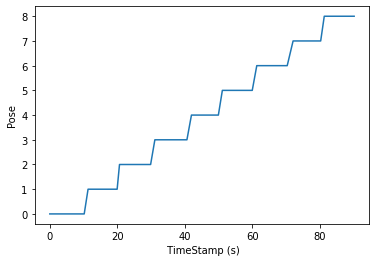

In [ ]:
#print(knn_train.df)
x_train = df_train.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 

x_train_numpy = x_train.values
y_train_numpy = y_train.values
x_test_numpy = x_test.values
y_test_numpy = y_test.values

print(x_train_numpy.shape)
print(x_test_numpy.shape)

#y_train = tf.keras.utils.to_categorical(y_train_numpy, num_classes=9)
#y_test = tf.keras.utils.to_categorical(y_test_numpy, num_classes=9)

print(y_train.shape)
print(y_test.shape)



(236946, 48)
(4039, 48)
(236946,)
(4039,)


In [ ]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4506    8
4507    8
4508    8
4509    8
4510    8
Name: Pose, Length: 4039, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_numpy)
x_train_numpy = scaler.transform(x_train_numpy)
x_test_numpy = scaler.transform(x_test_numpy)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam

opt = Adam(learning_rate=0.000050)

y_train = to_categorical(y_train_numpy,9)
y_test = to_categorical(y_test_numpy,9)

model = Sequential()
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dropout(rate=0.9))
model.add(Dense(9, activation='softmax'))
# 
model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
model.fit(x=x_train_numpy, y=y_train, batch_size=500, validation_data=(x_test_numpy, y_test), shuffle=True, epochs=50)


Epoch 1/50
474/474 [==============================] - 3s 4ms/step - loss: 2.4294 - accuracy: 0.1187 - val_loss: 2.1822 - val_accuracy: 0.2048
Epoch 2/50
474/474 [==============================] - 1s 3ms/step - loss: 2.1592 - accuracy: 0.1416 - val_loss: 2.1370 - val_accuracy: 0.2114
Epoch 3/50
474/474 [==============================] - 1s 3ms/step - loss: 2.1076 - accuracy: 0.1550 - val_loss: 2.0777 - val_accuracy: 0.5152
Epoch 4/50
474/474 [==============================] - 2s 3ms/step - loss: 2.0624 - accuracy: 0.1630 - val_loss: 2.0208 - val_accuracy: 0.6016
Epoch 5/50
474/474 [==============================] - 2s 3ms/step - loss: 2.0224 - accuracy: 0.1725 - val_loss: 1.9528 - val_accuracy: 0.7465
Epoch 6/50
474/474 [==============================] - 1s 3ms/step - loss: 1.9753 - accuracy: 0.1843 - val_loss: 1.8866 - val_accuracy: 0.7554
Epoch 7/50
474/474 [==============================] - 1s 3ms/step - loss: 1.9372 - accuracy: 0.1974 - val_loss: 1.8173 - val_accuracy: 0.6591
Epoch 

<AxesSubplot:>

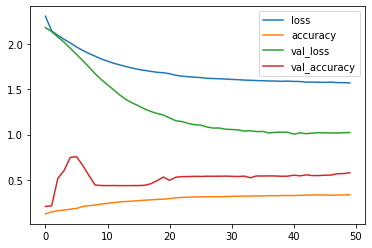

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

2332
% of corrects: 57.737063629611285


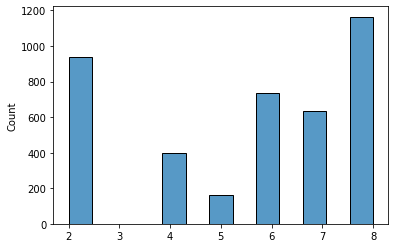

In [ ]:
predictions = model.predict(x_test_numpy)
predictions_final = []  
y_test_arr = []
for index in range(len(predictions)):
    predictions_final.append(predictions[index].argmax())
    y_test_arr.append(y_test[index].argmax())
sns.histplot(predictions_final)

number_of_corrects = 0
for i in range(len(predictions_final)):
    if(predictions_final[i] == y_test_arr[i]):
        number_of_corrects += 1
print(number_of_corrects)
print("% of corrects: {}".format(number_of_corrects/len(predictions_final)*100))

<AxesSubplot:xlabel='x', ylabel='y'>

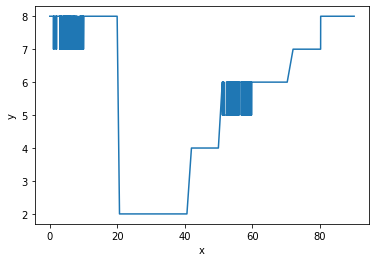

In [ ]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'],'y':predictions_final})
sns.lineplot(data=df_predict,x='x',y='y')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>